![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/12/spark21-2048x1365.png)

# Streamlit for Model Deployment
One of the most critical issues with regard to model creation was that the model itself would remain stuck in the notebook or .py file on Spyder.  The ability to share a model with people who cannot use either of these platforms has been rather limited till I discovered Streamlit.  Streamlit is a library in Python allowing for seamless model creation and deployment.

Through the use of very few lines of code an interactive html interface is opened on the web-browser which can be used by anyone to get an understanding of the model and suggest course corrections.  It allows for those cryptic lines of code to suddenly see the light of day in a manner that allows the viewer to be just as participative in the model creation process as the creator himself.

I have created this example which consists of two files.  One notebook file - which is the base model and another .py file which has to be run in conjunction to deploy the Streamlit file on a web-browser.

Key code snippets used in this file:
-  
- Pickle for storing a model
- Set option to display of max columns
-  Application of Label Encoder for coding Categorical values
- EDA with heatmaps using .corr, pairplots
- Application of Randomised Search CV with parameter distribution
- The key parameters for streamlit is in the .py file

To run the .py file please navigate to the file through the Anaconda Command prompt and type the following code:

### streamlit run app2.py

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('Display.max_columns', None)

import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

cars = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/car%20data.csv')
print(cars.shape)
cars.head()

In [38]:
cars.describe(include = 'all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [39]:
# the data does not seem to have missing values

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [40]:
for col in cars[['Fuel_Type', 'Seller_Type', 'Transmission']]:
    print('In', col, 'the unique values are', cars[col].unique())

In Fuel_Type the unique values are ['Petrol' 'Diesel' 'CNG']
In Seller_Type the unique values are ['Dealer' 'Individual']
In Transmission the unique values are ['Manual' 'Automatic']


In [41]:
cars['Current_Date'] = 2021
cars['Age'] = cars['Current_Date'] - cars['Year']
cars.drop(['Year', 'Current_Date', 'Car_Name'], 
          axis = 1,
          inplace = True)
cars.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [42]:
le = LabelEncoder()
final = cars[['Fuel_Type','Seller_Type','Transmission']].apply(le.fit_transform)
final

,Fuel_Type,Seller_Type,Transmission
0,2,0,1
1,1,0,1
2,2,0,1
3,2,0,1
4,1,0,1
...,...,...,...
296,1,0,1
297,2,0,1
298,2,0,1
299,1,0,1


In [43]:
cars.drop(['Fuel_Type','Seller_Type','Transmission'], axis = 1, inplace = True)

In [44]:
for col in final.columns:
    cars = cars.join(final[col])

cars.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type,Seller_Type,Transmission
0,3.35,5.59,27000,0,7,2,0,1
1,4.75,9.54,43000,0,8,1,0,1
2,7.25,9.85,6900,0,4,2,0,1
3,2.85,4.15,5200,0,10,2,0,1
4,4.60,6.87,42450,0,7,1,0,1


# EDA

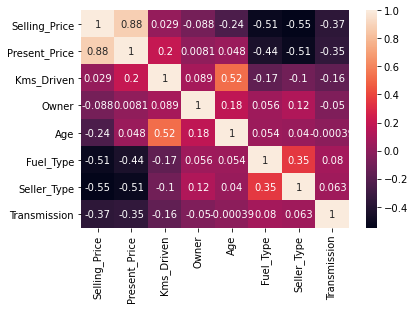

In [48]:
sns.heatmap(cars.corr(), annot= True);

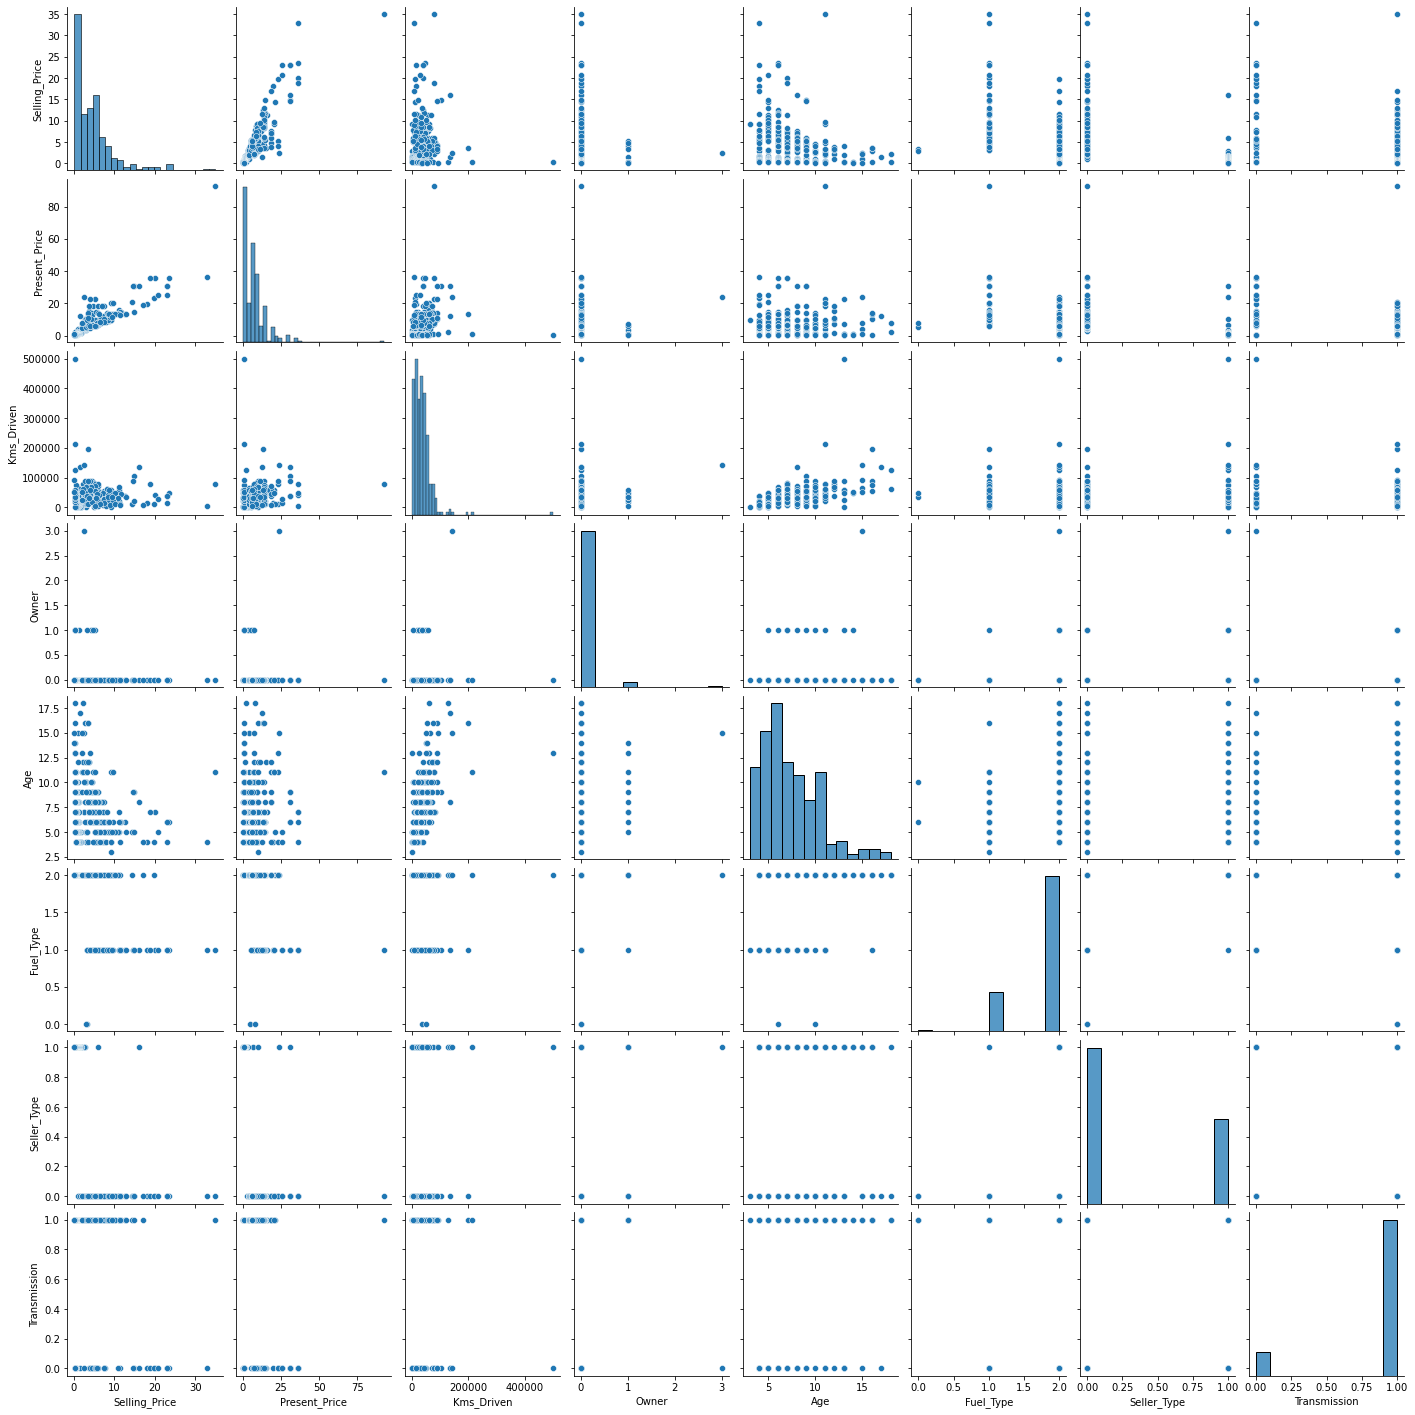

In [49]:
sns.pairplot(cars);

# Splitting the data

In [52]:
X = cars.iloc[:,1:]
y = cars.iloc[:,0]

print(X.shape)
print(X.columns)
print(y.shape)

(301, 7)
Index(['Present_Price', 'Kms_Driven', 'Owner', 'Age', 'Fuel_Type',
       'Seller_Type', 'Transmission'],
      dtype='object')
(301,)


In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .3, random_state = 0)

print(X_train.shape)
print(y_train.shape, '\n')

print(X_test.shape)
print(y_test.shape)


(210, 7)
(210,) 

(91, 7)
(91,)


In [59]:
#randomised search CV

n_estimators = [int(x) for x in np.linspace(100, 1200, 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace( 5,30, 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

print(random_grid, '\n')

rf = RandomForestRegressor(n_jobs = -1)

rf_random = RandomizedSearchCV(estimator= rf, 
                               param_distributions=random_grid,
                              scoring = 'neg_mean_squared_error',
                              n_iter = 100, cv = 50, verbose=2,
                              random_state= 42, n_jobs = -1 )
rf_random.fit(X_train,y_train)

print(rf_random.best_params_)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]} 

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2544 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3233 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4853 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  4.2min finished


{'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}


In [60]:
rf_random.best_score_

-2.63990783945335

In [61]:
pred = rf_random.predict(X_test)

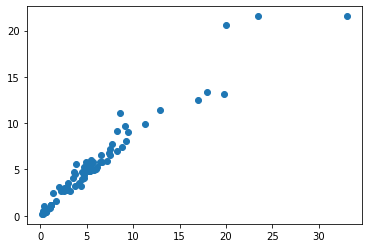

In [63]:
plt.scatter(y_test,pred);

In [64]:
print('MAE: %.8f' % metrics.mean_absolute_error(y_test,pred))
print('MSE: %.8f' % metrics.mean_squared_error(y_test,pred))
print('RMSE: %.8f' % np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.76948340
MSE: 2.84833406
RMSE: 1.68770082


# Dumping the model

In [65]:
file = open('rf_random.pkl', 'wb')
pickle.dump(rf_random, file)